In [1]:
import gym, torch, random, copy, time
import matplotlib.pyplot as plt

In [2]:
D_in = 6
H1 = 80
D_out = 3
lr = 0.01

layer_1 = torch.nn.Linear(D_in, H1)
layer_2 = torch.nn.Linear(H1, D_out)
layer_1.weight.data.fill_(0)
layer_2.weight.data.fill_(0)

model = torch.nn.Sequential(
    layer_1,
    torch.nn.ReLU(),
    layer_2
)

loss_fn = torch.nn.MSELoss(reduction="sum")

optim = torch.optim.Adam(model.parameters(), lr=lr)

0 -500.0
10 -451.27272727272725
20 -460.1904761904762
30 -457.9032258064516
40 -468.1707317073171
50 -467.7647058823529
60 -468.1475409836066
70 -472.63380281690144
80 -476.01234567901236
90 -477.1978021978022
100 -479.45544554455444
110 -478.81081081081084
120 -480.56198347107437
130 -482.0458015267176
140 -483.3191489361702
150 -479.8344370860927
160 -481.0869565217391
170 -479.5964912280702
180 -479.16574585635357
190 -478.75916230366494
200 -479.6169154228856
210 -479.07582938388623
220 -480.0226244343891
230 -480.8874458874459
240 -479.2780082987552
250 -478.2231075697211
260 -478.14942528735634
270 -477.1808118081181
280 -477.9928825622776
290 -477.45017182130584
300 -478.19933554817277
310 -478.9003215434084
320 -478.7258566978193
330 -478.3716012084592
340 -479.0058651026393
350 -479.6039886039886
360 -478.4072022160665
370 -478.989218328841
380 -479.2808398950131
390 -479.2480818414322
400 -479.0149625935162
410 -479.1824817518248
420 -479.67695961995247
430 -480.1484918793503

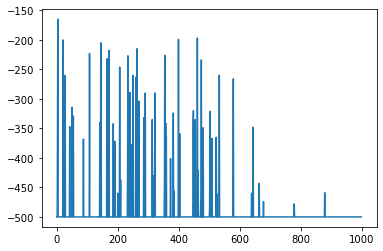

In [4]:
start_time = time.time()
env = gym.make('Acrobot-v1')
gamma = 0.9
epsilon = 0.2
epsilon_decay = 1
reward_arr = []
cum_reward = 0
for _ in range(1000):
    
    current_state = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        current_state = torch.FloatTensor(current_state)
        y_pred = model(current_state)
        
#         env.render()
        
        if random.random()<epsilon:
            action = env.action_space.sample()
        else:
            action = torch.argmax(y_pred).item()
        
        next_state, reward, done, info = env.step(action)
        
        episode_reward += reward
        cum_reward+=reward
        
#         current_state = next_state
#         if done:
#             break
#         continue
        
        if done:
            target_array = y_pred.tolist()
            target_array[action] = -100
            target_tensor = torch.FloatTensor(target_array)

            #print(action, y_pred.tolist(), target_tensor.tolist())
            loss = loss_fn(y_pred, target_tensor)

            optim.zero_grad()
            loss.backward()
            optim.step()
            break
        else:
            target_array = y_pred.tolist()
            with torch.no_grad():
                target_array[action] = reward + gamma*torch.max(model(torch.FloatTensor(next_state))).item()
            target_tensor = torch.FloatTensor(target_array)

            #print(action, y_pred.tolist(), target_tensor.tolist())
            loss = loss_fn(y_pred, target_tensor)

            optim.zero_grad()
            loss.backward()
            optim.step()

            current_state = next_state
            

    reward_arr.append(episode_reward)
    epsilon *= epsilon_decay
        
    if _%10==0:
        print(_, cum_reward/(_+1))
env.close()
plt.plot(reward_arr)
print(time.time()-start_time)

In [ ]:
plt.plot(reward_arr)
plt.show()

running_avg = []
val = 0

for i in range(len(reward_arr)):
    val += reward_arr[i]
    running_avg.append(val/(i+1))
plt.plot(running_avg)
plt.show()